<a href="https://colab.research.google.com/github/ogut77/CTV/blob/main/HWTBATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

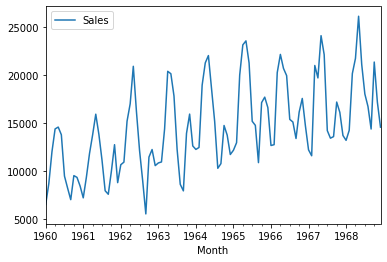

In [1]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, index_col='Month',
                      parse_dates=True)
# plot the time series
df.plot()
pyplot.show()

In [2]:
print(df.shape)

(108, 2)


In [2]:

train = df[:96]
test = df[96:]
print("Full data shape is "+ str(df.shape))
print("Train data shape is "+ str(train.shape))
print("Test data shape is "+ str(test.shape))

Full data shape is (108, 1)
Train data shape is (96, 1)
Test data shape is (12, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

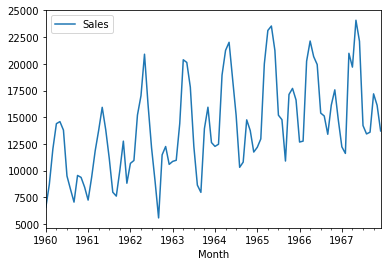

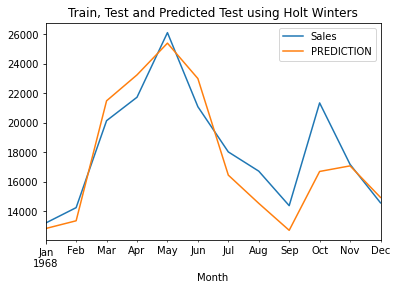

In [17]:
import pandas as pd
import numpy as np
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(12)
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [16]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

Mean Absolute Error = 1472.4745108595473
Mean Squared Error = 4002662.74993866
Mean Absolute Percentage Error = 25.180245130430727


In [17]:
!pip install tbats

     |████████████████████████████████| 43 kB 1.2 MB/s 
     |████████████████████████████████| 1.4 MB 8.8 MB/s 
     |████████████████████████████████| 9.8 MB 50.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [6]:
from tbats import TBATS
import numpy as np
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=False,  # shall try only models without ARMA
    use_box_cox=False  # will not use Box-Cox
)
model = estimator.fit(train)

Mean Absolute Error = 1609.9873653117677
Mean Squared Error = 5038277.504034019
Mean Absolute Percentage Error = 23.197195423617472


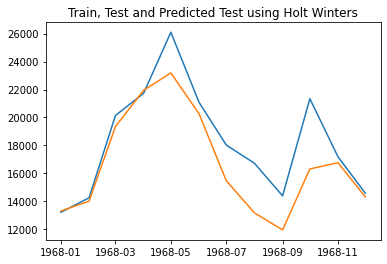

In [44]:
import pandas as pd
test_predictions = model.forecast(steps=12)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')


test_predictions=pd.DataFrame(test_predictions)
new_index = test.index
test_predictions=test_predictions.set_index(new_index)
test_predictions.columns=['SALES']
plt.plot(test.index, test,test_predictions.index,test_predictions)
plt.title('Train, Test and Predicted Test using Holt Winters');